# Awareness Level

https://books.google.ca/books?id=YWcLBAAAQBAJ&pg=PA60&lpg=PA60&dq=kde2d+log&source=bl&ots=7AB-RAoMqY&sig=gFaHSoQCoGMXrR9BTaLOdCs198U&hl=en&sa=X&ei=8mQDVPqtMsi4ggSRnILQDw&redir_esc=y#v=onepage&q=kde2d%20log&f=false

https://www.r-bloggers.com/5-ways-to-do-2d-histograms-in-r/

In [1]:
library("MASS")

In [2]:
library(data.table)
library(ggplot2)
library(latex2exp)

In [82]:
mypath <- "../../log/URV-contact-active"

In [83]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [84]:
thepath = list.dirs(mypath)[10]

In [85]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")

In [86]:
DF <- read.csv(file = filename, skip=12)

In [87]:
tempDF <- DF[DF$state =='i',]
tempDF <- tempDF[tempDF$time == 1,]

In [88]:
tempDF

,time,agent,k.core,state,degree
1025,1,1024,3,i,3


In [89]:
agent <- as.integer(tempDF['agent'])
kcore <- as.integer(tempDF['k.core'])

In [90]:
DF$'agent.init' <- agent
DF$'k.core.init' <- kcore
DF$'density' <- 1

In [91]:
DT <- data.table(DF)

In [92]:
DT <- DT[DT$time == 200]

In [93]:
DT <- DT[DT$state == 's']

In [94]:
DT1 = DT[, sum(density), by=list(degree, k.core)]

In [95]:
DT1 <- DT1[-1,]

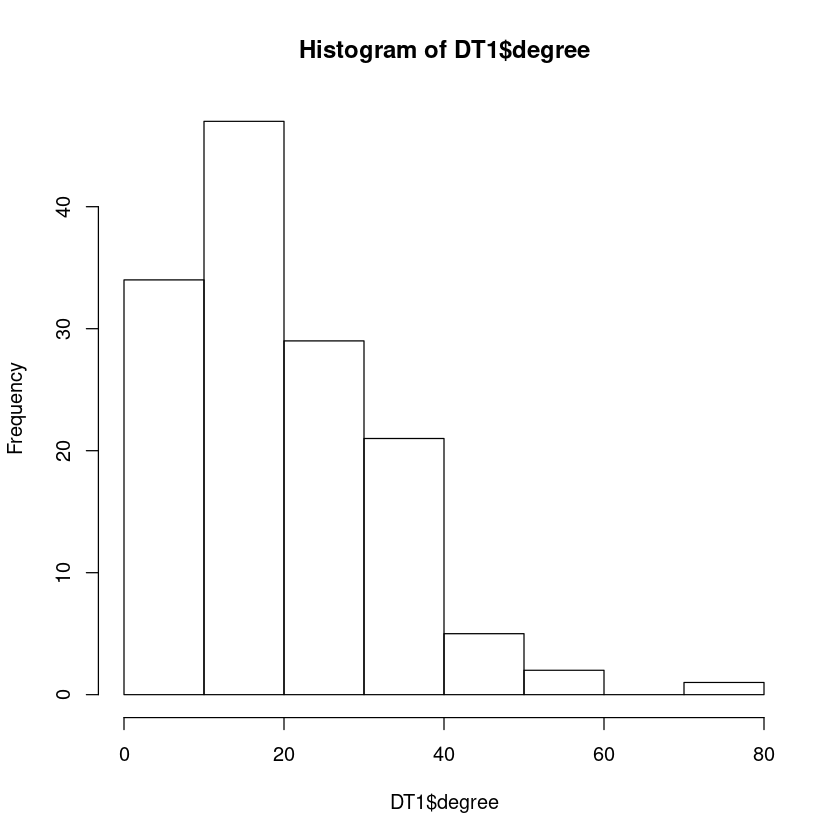

In [96]:
hist(DT1$degree)

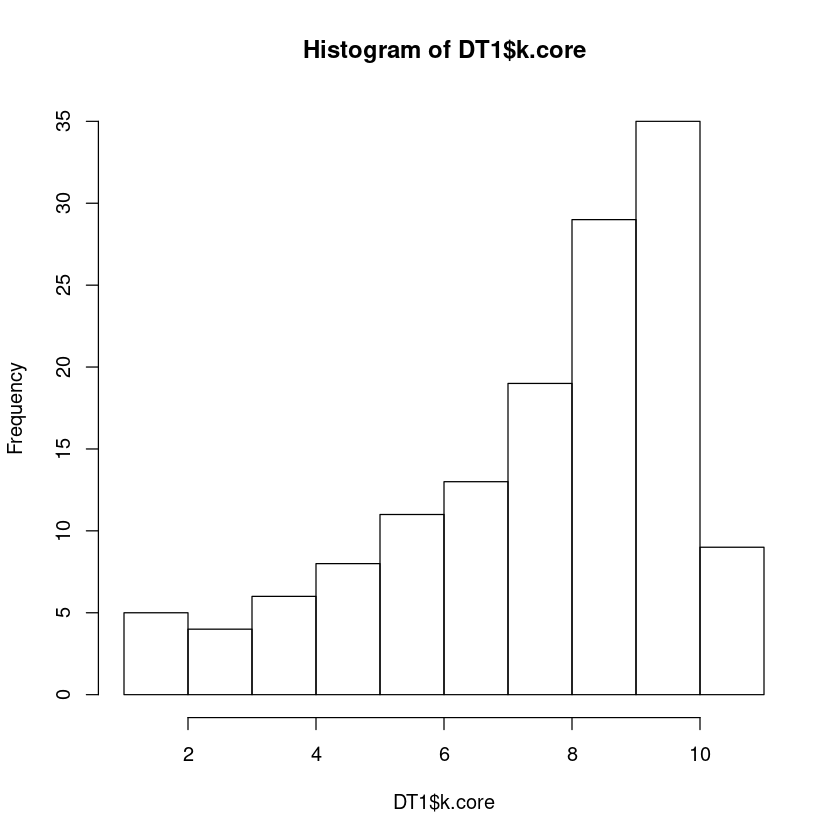

In [97]:
hist(DT1$k.core)

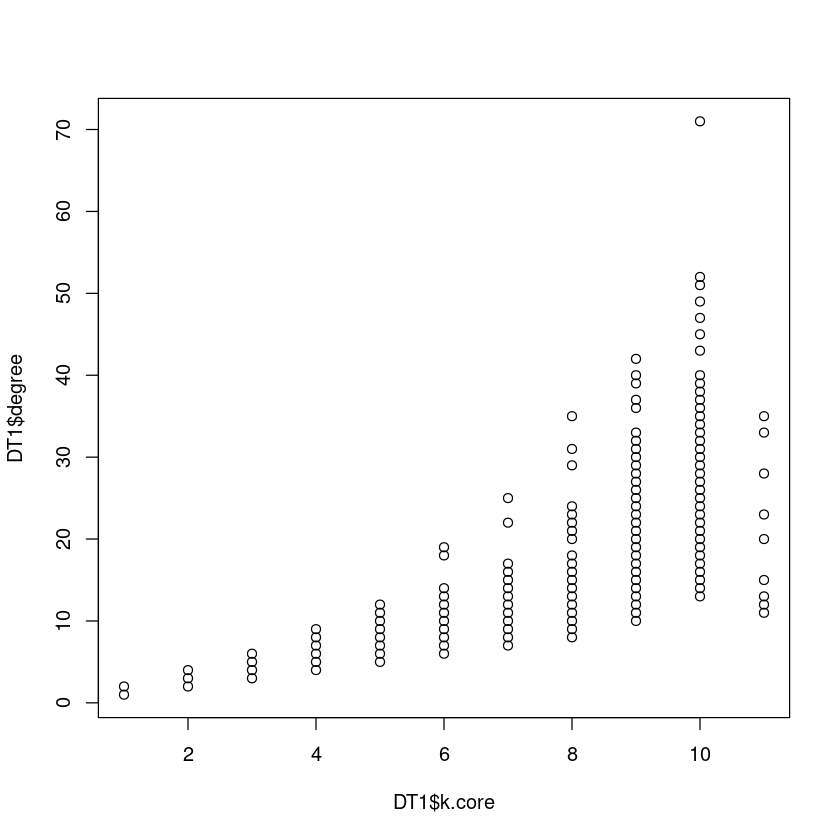

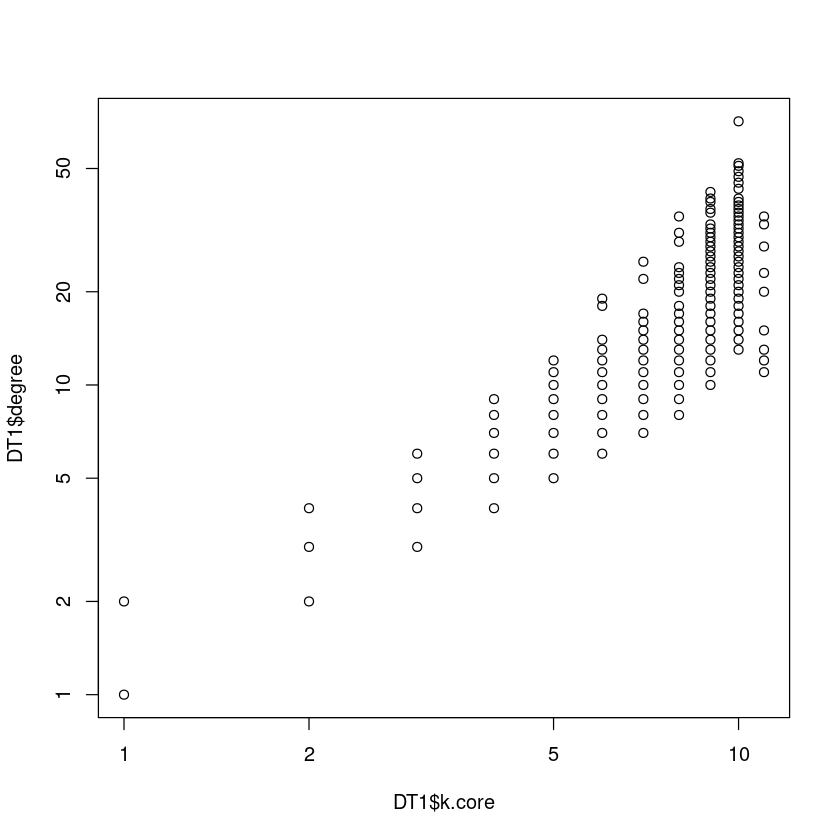

In [98]:
plot(DT1$k.core, DT1$degree)
plot(DT1$k.core, DT1$degree, log='xy')


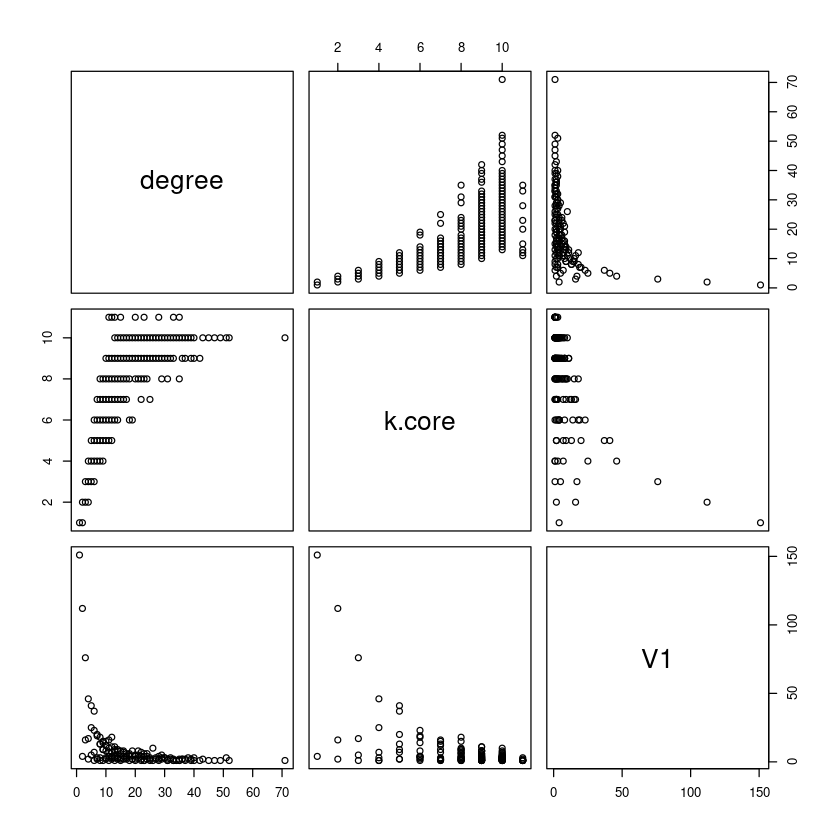

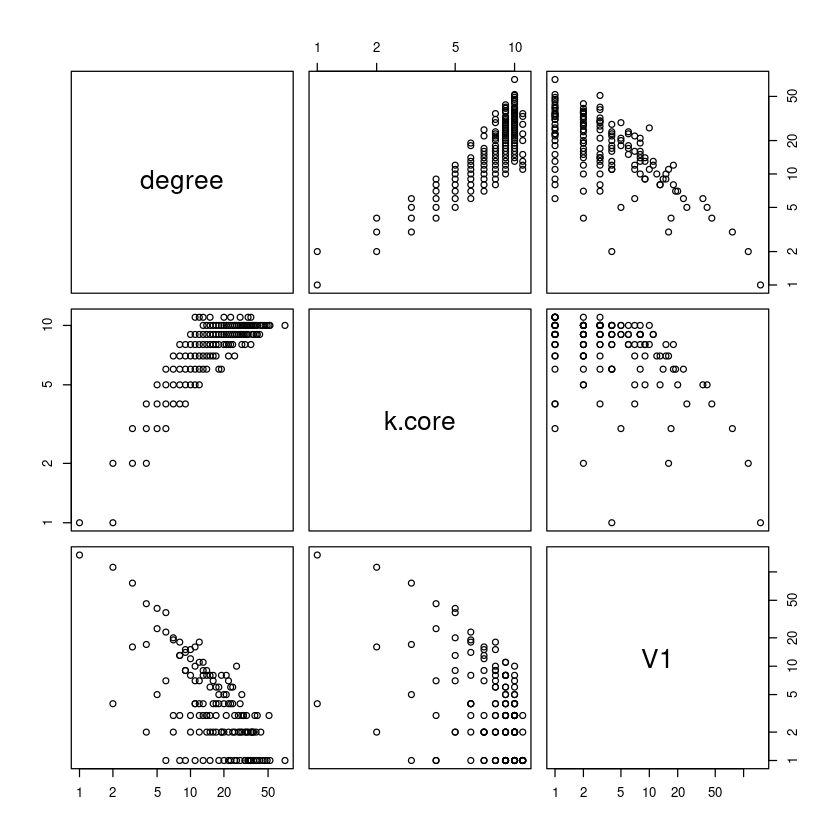

In [99]:
plot(DT1)
plot(DT1, log='xy')

In [105]:
library(RColorBrewer)
rf <- colorRampPalette(rev(brewer.pal(11,'Spectral')))
r <- rf(32)

In [106]:
breaks.degree = 20
breaks.k.core = 11

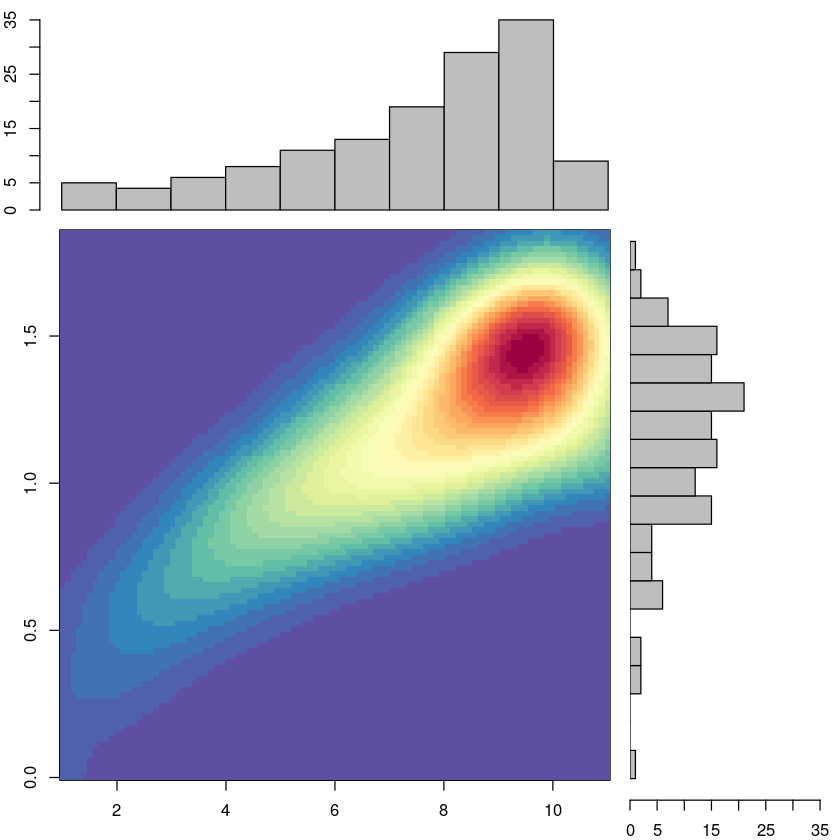

In [107]:
X<-DT1$k.core
Y<-log10(DT1$degree)



h1 <- hist(X, breaks=breaks.k.core, plot=F)
h2 <- hist(Y, breaks=breaks.degree, plot=F)
#h2$counts = log(h2$counts, 2)
top <- max(h1$counts, h2$counts)

k <- kde2d(X, Y, n=100)

# margins
oldpar <- par()
par(mar=c(3,3,1,1))
layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1), c(1,3))
#k<-filled.contour(k,color.palette=colorRampPalette(c('white','blue','yellow','red','darkred')))
image(k, col=r) #plot the image

par(mar=c(0,2,1,0))
barplot(h1$counts, axes=T, ylim=c(0, top), space=0, col='grey')
par(mar=c(2,0,0.5,1))
barplot(h2$counts, axes=T, xlim=c(0, top), space=0, col='grey', horiz=T)

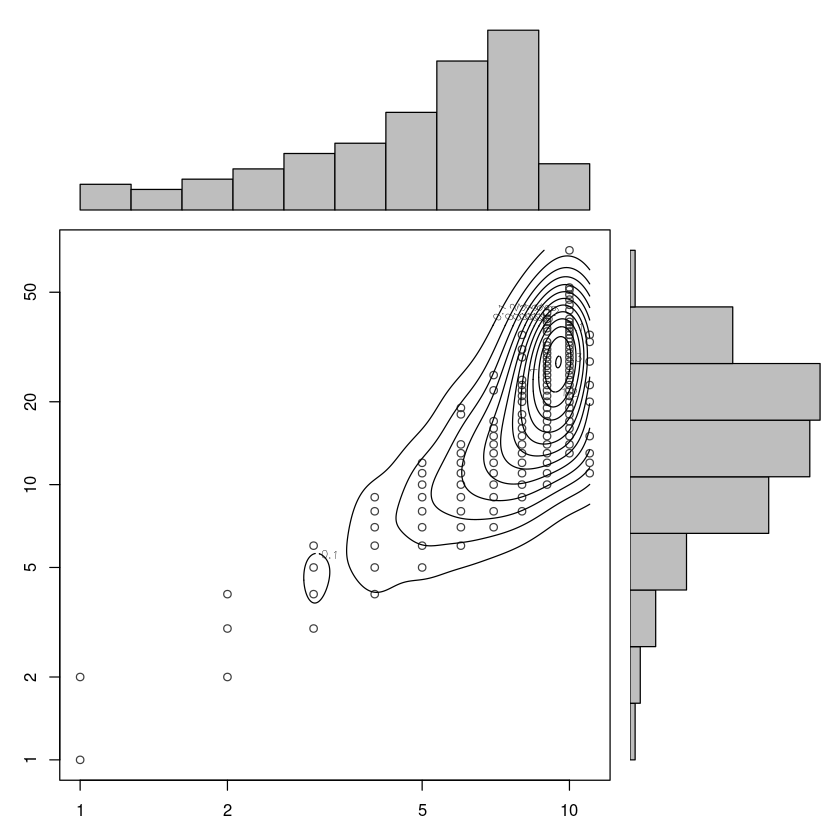

In [115]:
X<-DT1$k.core
Y<-DT1$degree

h1 <- hist(X, breaks=11, plot=F)
h2 <- hist(log(Y), breaks=10, plot=F)
#h2$counts = log(h2$counts, 2)
top <- max(c(h1$counts, h2$counts))

k <- kde2d(log(X), log(Y), n=1500)

# margins
oldpar <- par()
par(mar=c(3,3,1,1))
layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1), c(1,3), TRUE)
plot(X, Y, xlab="", ylab="", log="xy", col="grey25")
contour(exp(k$x), exp(k$y), k$z, add=TRUE)
#image(k,) #plot the image
par(mar=c(0,3,1,1))
barplot(h1$counts, axes=F, ylim=c(0, top), space=0, col='grey')
par(mar=c(3,0,1,1))
barplot(h2$counts, axes=F, xlim=c(0, top), space=0, col='grey', horiz=T)

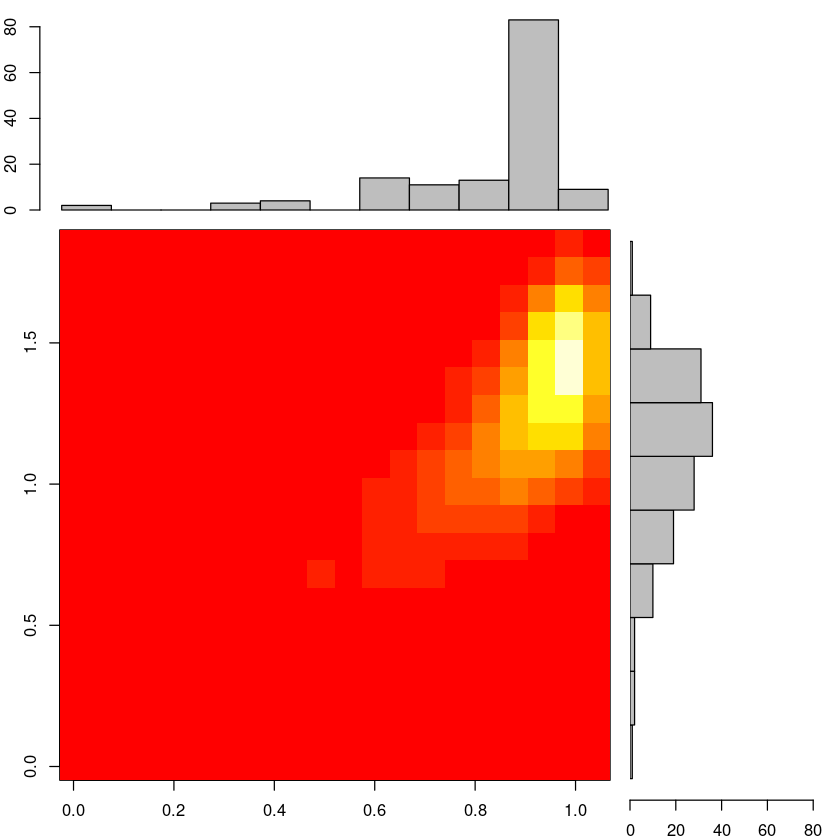

In [112]:
X<-log10(DT1$k.core)
Y<-log10(DT1$degree)

h1 <- hist(X, breaks=11, plot=F)
h2 <- hist(Y, breaks=10, plot=F)
#h2$counts = log(h2$counts, 2)
top <- max(h1$counts, h2$counts)

k <- kde2d(X, Y, n=20)

# margins
oldpar <- par()
par(mar=c(3,3,1,1))
layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1), c(1,3))
#k<-filled.contour(k,color.palette=colorRampPalette(c('white','blue','yellow','red','darkred')))
image(k,) #plot the image

par(mar=c(0,2,1,0))
barplot(h1$counts, axes=T, ylim=c(0, top), space=0, col='grey')
par(mar=c(2,0,0.5,1))
barplot(h2$counts, axes=T, xlim=c(0, top), space=0, col='grey', horiz=T)

In [20]:
X<-df$'k-core'
Y<-df$degree

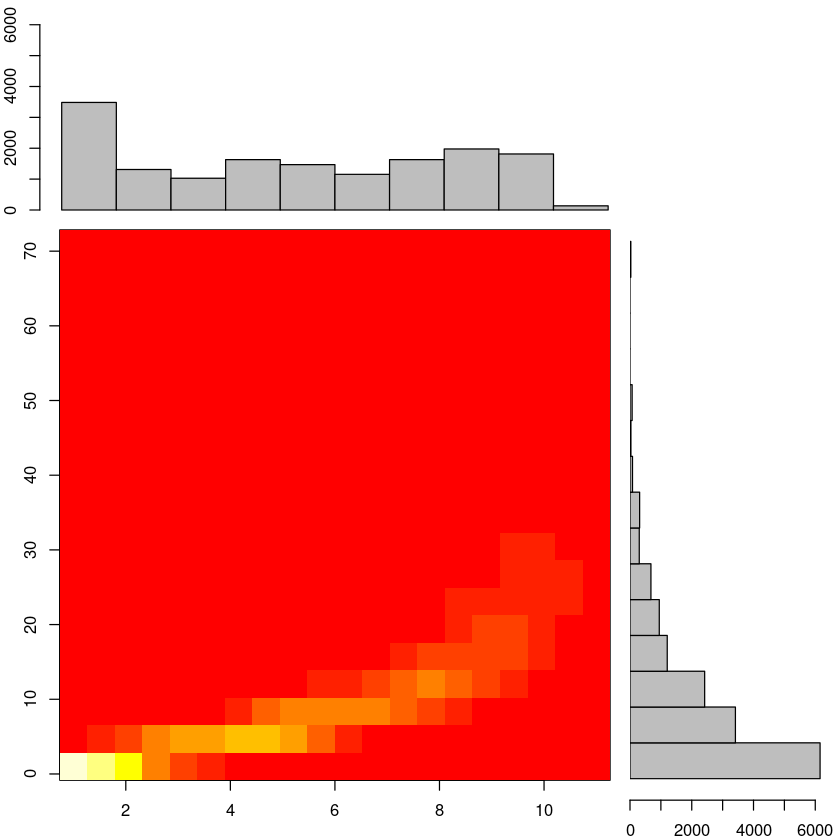

In [25]:
h1 <- hist(X, breaks=11, plot=F)
h2 <- hist(Y, breaks=10, plot=F)
#h2$counts = log(h2$counts, 2)
top <- max(h1$counts, h2$counts)

k <- kde2d(X, Y, n=20)

# margins
oldpar <- par()
par(mar=c(3,3,1,1))
layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1), c(1,3))
#k<-filled.contour(k,color.palette=colorRampPalette(c('white','blue','yellow','red','darkred')))
image(k,) #plot the image

par(mar=c(0,2,1,0))
barplot(h1$counts, axes=T, ylim=c(0, top), space=0, col='grey')
par(mar=c(2,0,0.5,1))
barplot(h2$counts, axes=T, xlim=c(0, top), space=0, col='grey', horiz=T)

https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/kde2d.html

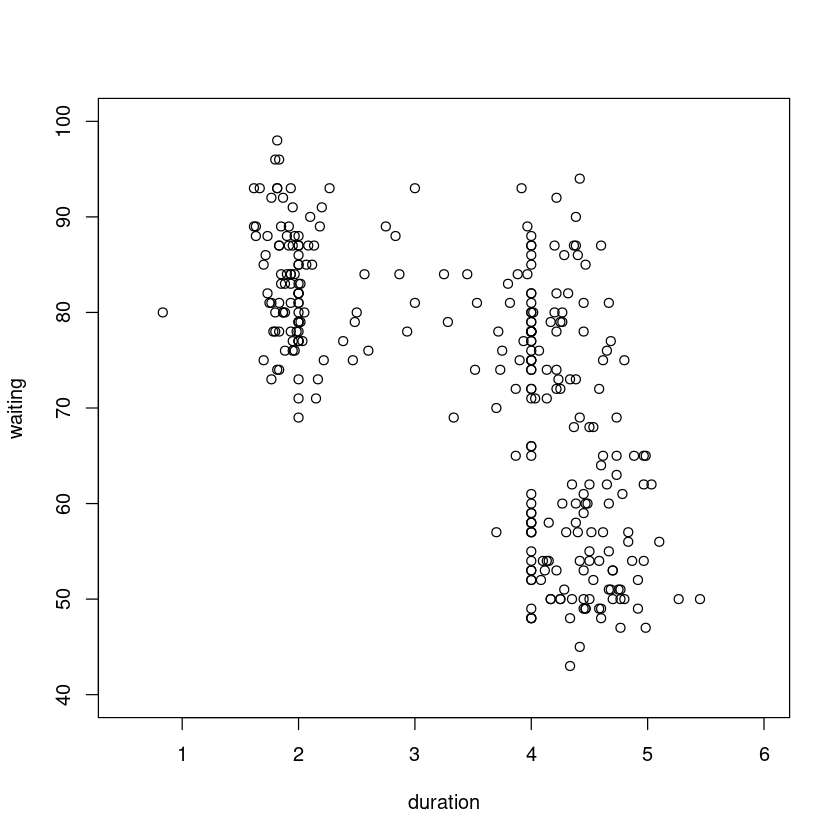

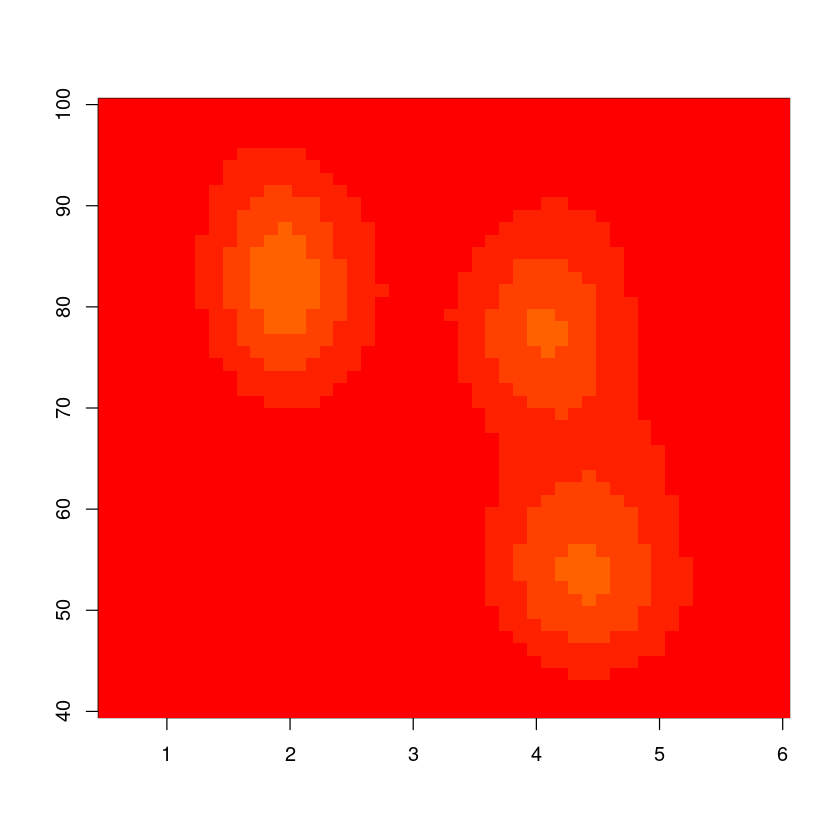

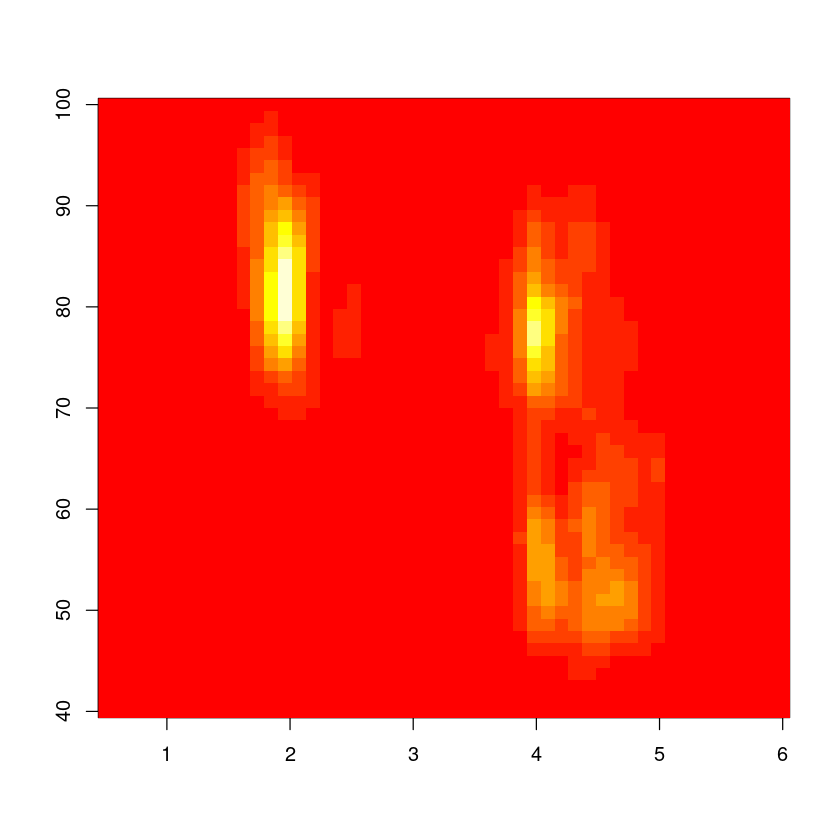

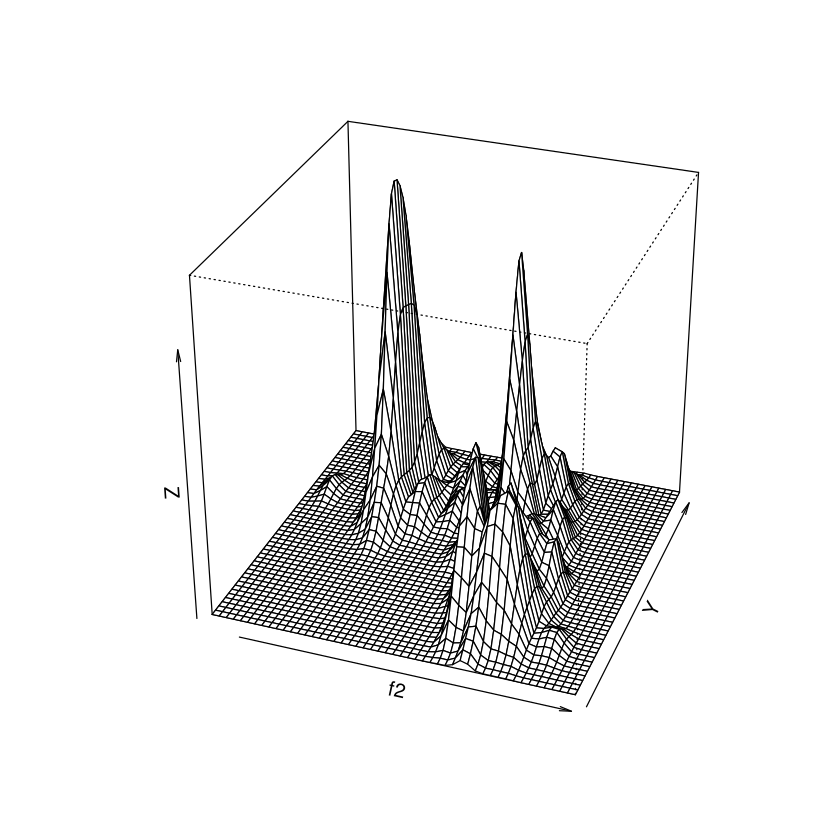

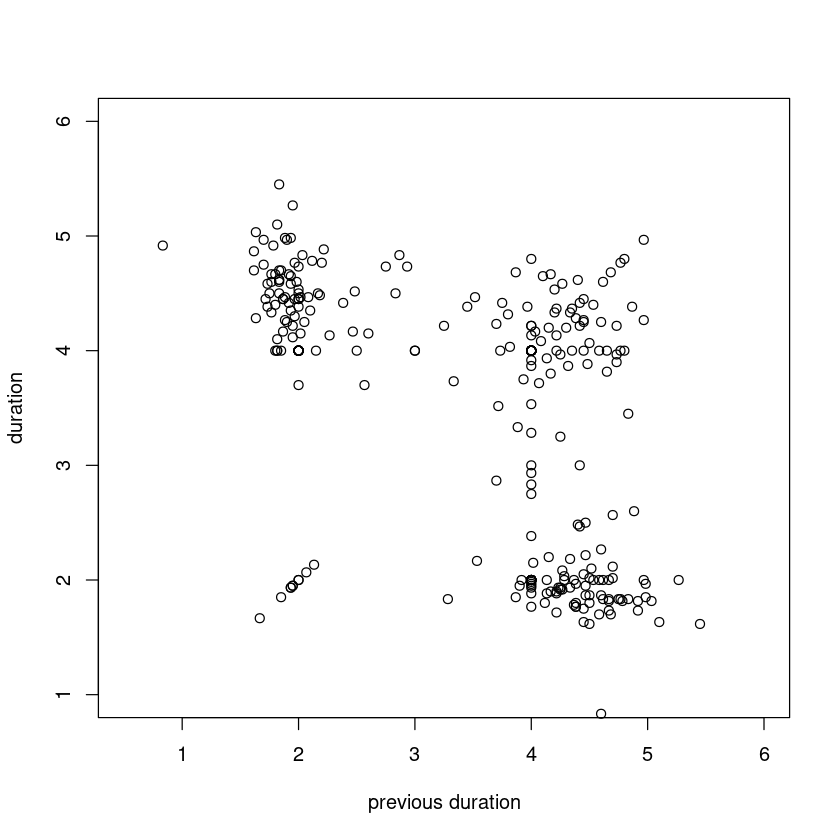

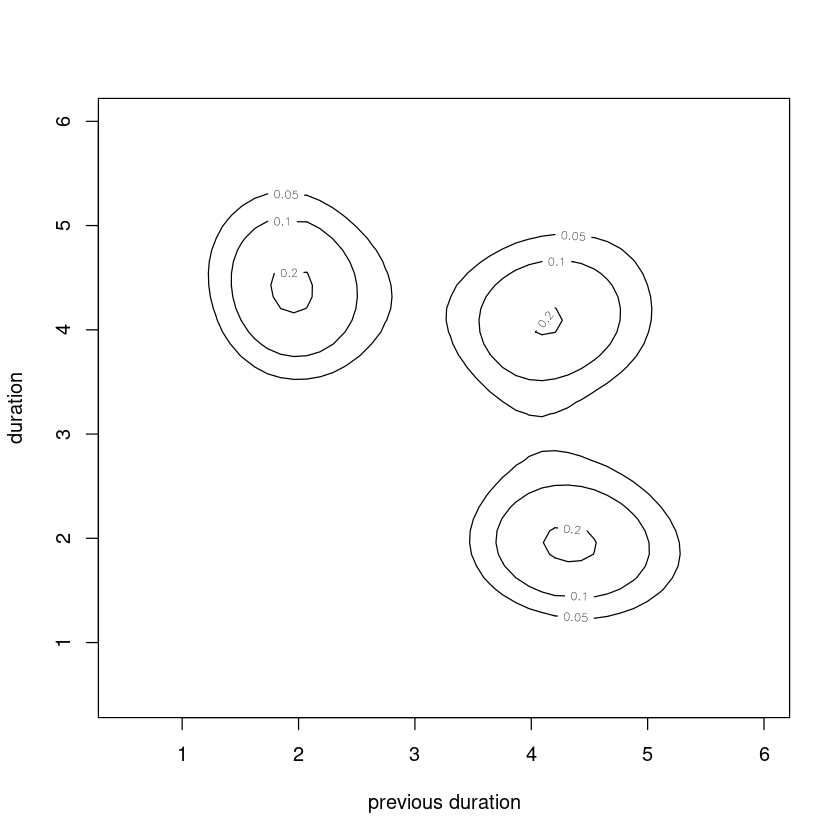

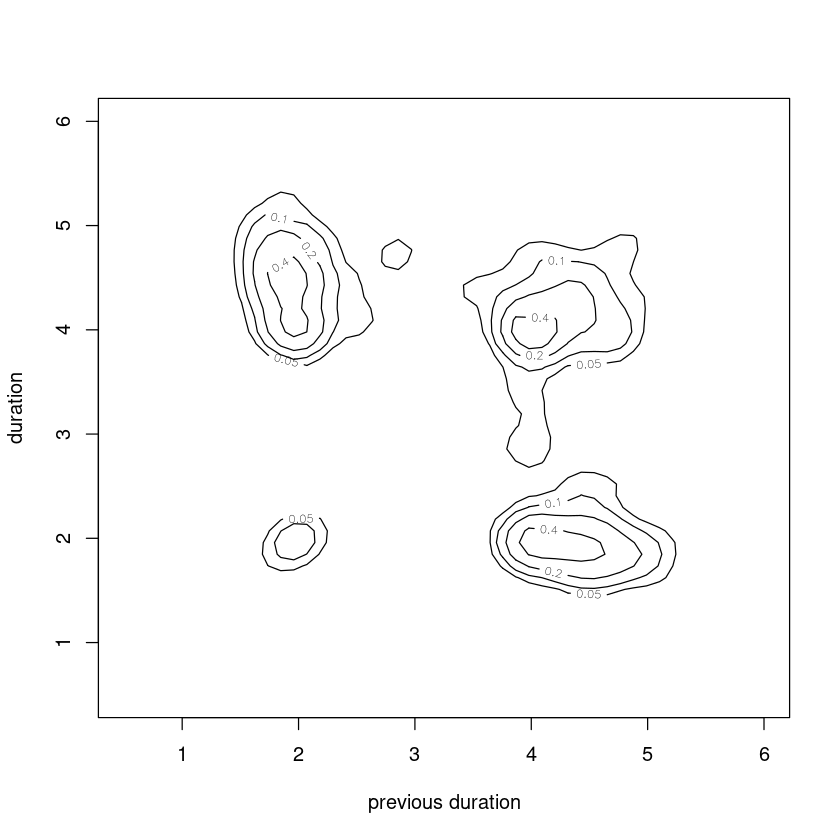

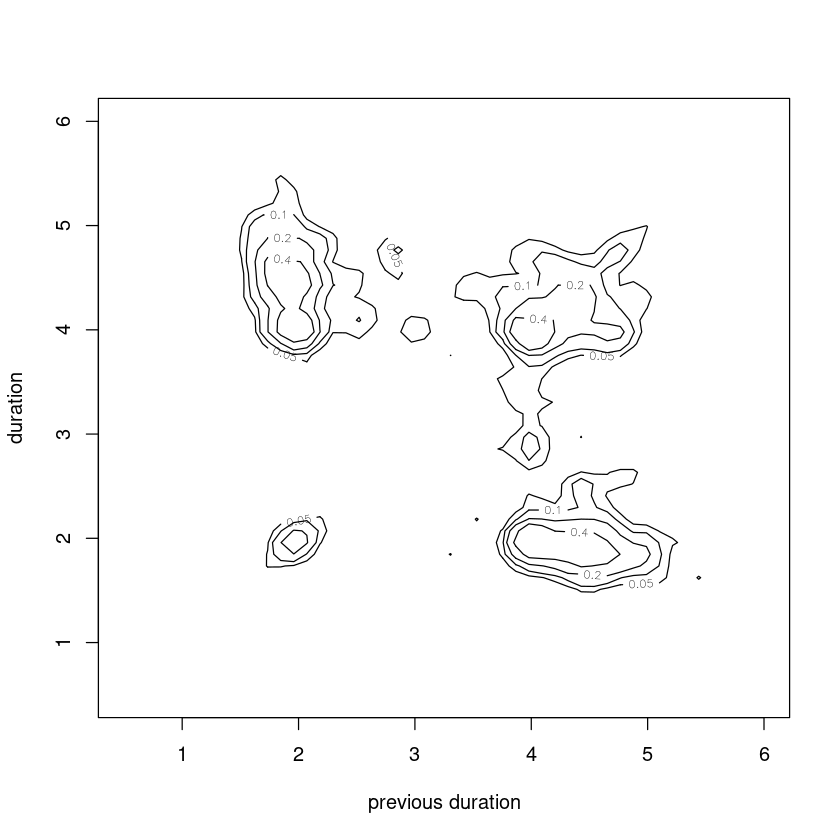

In [117]:
attach(geyser)
plot(duration, waiting, xlim = c(0.5,6), ylim = c(40,100))
f1 <- kde2d(duration, waiting, n = 50, lims = c(0.5, 6, 40, 100))
image(f1, zlim = c(0, 0.05))
f2 <- kde2d(duration, waiting, n = 50, lims = c(0.5, 6, 40, 100),
            h = c(width.SJ(duration), width.SJ(waiting)) )
image(f2, zlim = c(0, 0.05))
persp(f2, phi = 30, theta = 20, d = 5)

plot(duration[-272], duration[-1], xlim = c(0.5, 6),
     ylim = c(1, 6),xlab = "previous duration", ylab = "duration")
f1 <- kde2d(duration[-272], duration[-1],
            h = rep(1.5, 2), n = 50, lims = c(0.5, 6, 0.5, 6))
contour(f1, xlab = "previous duration",
        ylab = "duration", levels  =  c(0.05, 0.1, 0.2, 0.4) )
f1 <- kde2d(duration[-272], duration[-1],
            h = rep(0.6, 2), n = 50, lims = c(0.5, 6, 0.5, 6))
contour(f1, xlab = "previous duration",
        ylab = "duration", levels  =  c(0.05, 0.1, 0.2, 0.4) )
f1 <- kde2d(duration[-272], duration[-1],
            h = rep(0.4, 2), n = 50, lims = c(0.5, 6, 0.5, 6))
contour(f1, xlab = "previous duration",
        ylab = "duration", levels  =  c(0.05, 0.1, 0.2, 0.4) )
detach("geyser")